In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('internet_service_churn.csv')
data.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [4]:
# Checking the shape of the dataset
print("Numner of Columns in the Dataset are : ", data.shape[1])
print("\nNumner of Columns in the Dataset are : ", data.shape[0])

Numner of Columns in the Dataset are :  11

Numner of Columns in the Dataset are :  72274


In [5]:
# checking basic information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [6]:
print("\nDatatypes of the Columns")
print('--------------------------------')
print("\nColumns with 'int' datatype : ")
for i in list(data.select_dtypes(include=['int64']).columns):
    print(i)

print('\n--------------------------------')
print("Columns with 'float' datatype : ")
for f in list(data.select_dtypes(include=['float64']).columns):
    print(f)

print('\n--------------------------------')
print("Columns with 'String' datatype : ")
for s in list(data.select_dtypes(include=['object']).columns):
    print(s)


Datatypes of the Columns
--------------------------------

Columns with 'int' datatype : 
id
is_tv_subscriber
is_movie_package_subscriber
bill_avg
service_failure_count
download_over_limit
churn

--------------------------------
Columns with 'float' datatype : 
subscription_age
reamining_contract
download_avg
upload_avg

--------------------------------
Columns with 'String' datatype : 


## EDA

[]

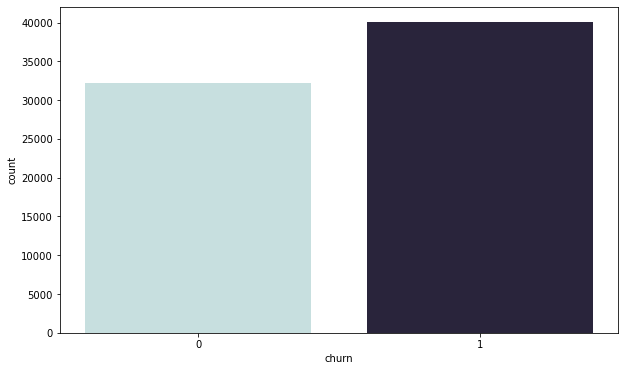

In [5]:
# First let's see how much customer are already churned

plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'churn', palette= 'ch:start=.2,rot=-.3')
plt.plot()

In [6]:
df['churn'].value_counts()

1    40050
0    32224
Name: churn, dtype: int64

In [7]:
# Now let's check if the customer has "tv_subscription" who has cancelled the service

# First check the number of TV subscriber and not subscriberr
df['is_tv_subscriber'].value_counts()

1    58922
0    13352
Name: is_tv_subscriber, dtype: int64

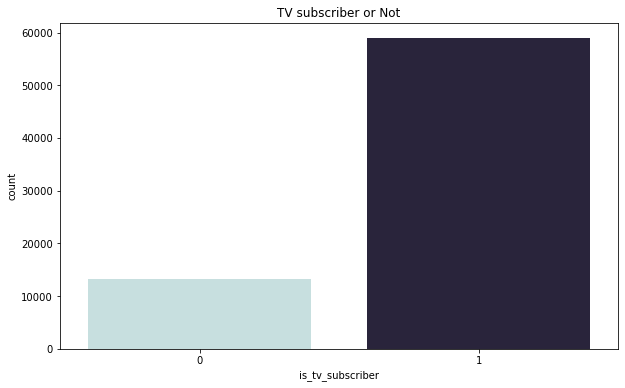

In [8]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'is_tv_subscriber', palette= 'ch:start=.2,rot=-.3')
plt.title('TV subscriber or Not')
plt.show()

In [9]:
# Now let's check if the customers has a "Movie Package subscription" or not
# First we'll see the number of counts and then will see a visual graph for this
df['is_movie_package_subscriber'].value_counts()

0    48089
1    24185
Name: is_movie_package_subscriber, dtype: int64

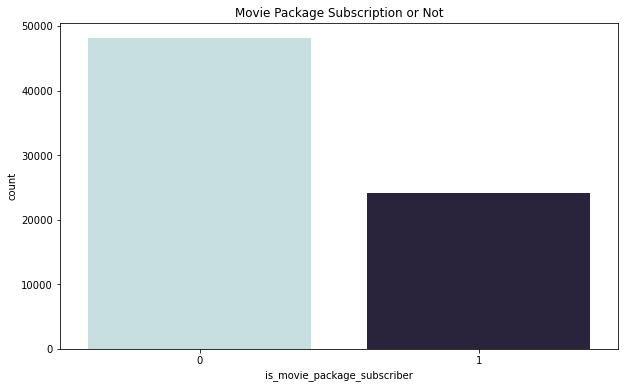

In [10]:
plt.figure(figsize = (10,6))
sns.countplot(data =df, x = 'is_movie_package_subscriber', palette= 'ch:start=.2,rot=-.3')
plt.title('Movie Package Subscription or Not')
plt.show()

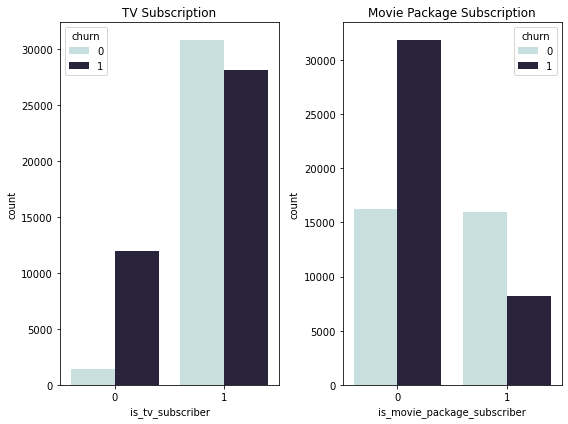

In [5]:
# creating subplot
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Tv subscription or not
sns.countplot(data = df, x = 'is_tv_subscriber', hue = 'churn', palette= 'ch:start=.2,rot=-.3', ax=axes[0])
axes[0].set_title("TV Subscription")

# Movie package subscription or not
sns.countplot(data = df, x = 'is_movie_package_subscriber', hue = 'churn', palette= 'ch:start=.2,rot=-.3', ax=axes[1])
axes[1].set_title('Movie Package Subscription')
fig.tight_layout()

In [12]:
# Now, let's check for  service_failure_count features
# first check the unique category
print(df['service_failure_count'].unique())
print(df['service_failure_count'].value_counts())

[ 0  1  2  6  4 10  5  3  8  7 11  9 13 14 15 19 18 12 16]
0     60407
1      7665
2      2453
3       901
4       395
5       201
6        97
7        58
8        37
9        17
10       15
11        6
12        6
13        5
14        4
16        3
15        2
19        1
18        1
Name: service_failure_count, dtype: int64


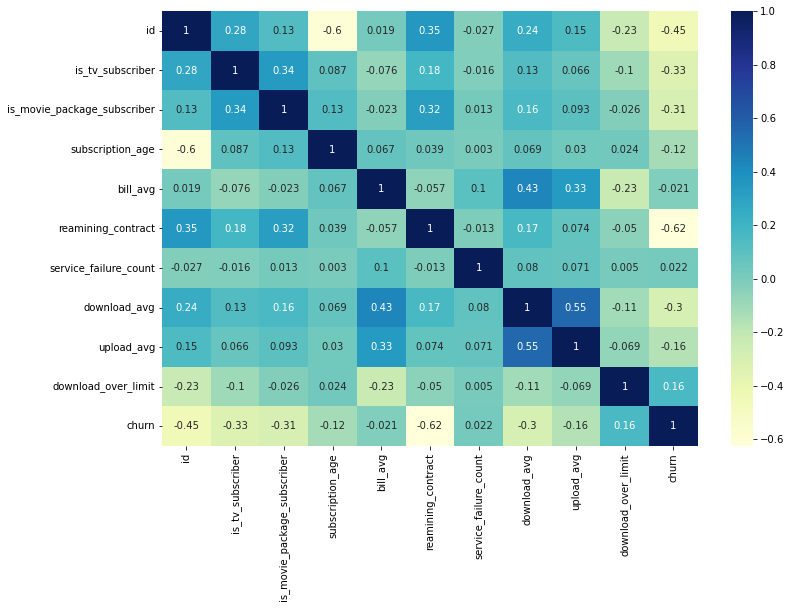

In [24]:
# heatmap to find correlation

plt.figure(figsize = (12,8))
sns.heatmap(np.round(df.corr(), 3), annot= True,  cmap= 'YlGnBu')
plt.show()

## Data Cleaning and Feature Engineering

In [25]:
# First I'll take care of the missing values
# check the missing vlaue
df.isnull().mean()

id                             0.000000
is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.298475
service_failure_count          0.000000
download_avg                   0.005272
upload_avg                     0.005272
download_over_limit            0.000000
churn                          0.000000
dtype: float64

In [11]:
Missing_cloumns = data.columns[data.isnull().any()]
print("Total no. of Columns with Missing/NA Values : ", len(Missing_cloumns))
print("\nName of the Columns with Missing Values : ")
for i in Missing_cloumns:
      print(i)

Total no. of Columns with Missing/NA Values :  3

Name of the Columns with Missing Values : 
reamining_contract
download_avg
upload_avg


In [12]:
# Taking care of "reamining_contract"
df['reamining_contract'] = df['reamining_contract'].fillna(df['reamining_contract'].median())

In [13]:
# For the rest two fetures I'll use mean to impute them.
df['download_avg'] = df['download_avg'].fillna(df['download_avg'].mean())
df['upload_avg'] = df['upload_avg'].fillna(df['upload_avg'].mean())

In [14]:
# removing id column
df.drop('id', axis = 1, inplace = True)

In [15]:
# Now first let's seperate the target from the features

x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [16]:
x.shape

(72274, 9)

In [19]:
# first let's split the dataset into train & test set after that I'll perform feature selection.
# This because if we done this step before spliting this may cause bias
# spliting
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.20, random_state = 41)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(57819, 9) (14455, 9) (57819,) (14455,)


## Modelling

## Random Forest

### First Iteration of the Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
RF_1 = RandomForestClassifier()
RF_1.fit(X_train, Y_train)

RandomForestClassifier()

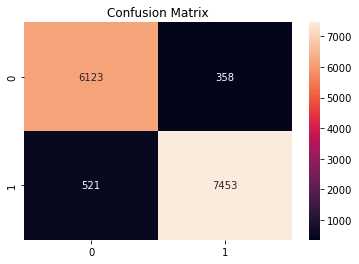

In [21]:
from sklearn.metrics import confusion_matrix
ypred = RF_1.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [22]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9391905914908336
Precision = 0.9541672001024196
Recall = 0.9346626536242789
F1 Score = 0.9443142223630029


ROC AUC = 0.9795614871925797


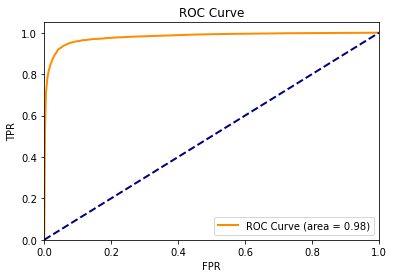

In [23]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF_1.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Second Iteration of the Random Forest

In [24]:
RF_2 = RandomForestClassifier(n_estimators=150,random_state=8,n_jobs=-1)
RF_2.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=8)

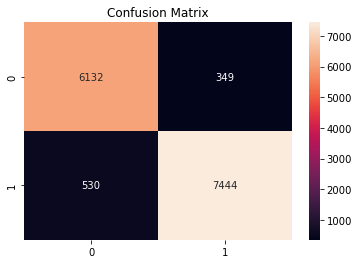

In [25]:
from sklearn.metrics import confusion_matrix
ypred = RF_2.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [26]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9391905914908336
Precision = 0.9552162196843321
Recall = 0.9335339854527214
F1 Score = 0.9442506500919643


ROC AUC = 0.9804140497196046


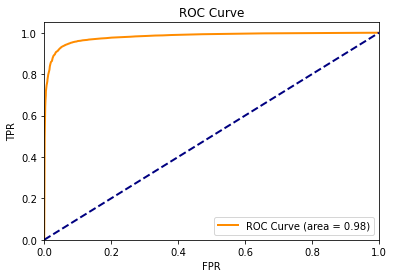

In [27]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF_2.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nb = GaussianNB()

# We train model
nb.fit(X_train, Y_train)

GaussianNB()

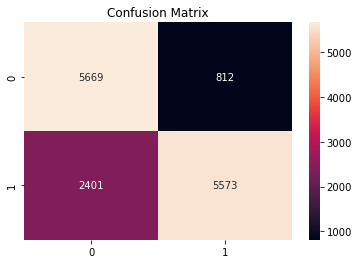

In [29]:
from sklearn.metrics import confusion_matrix
ypred = nb.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [30]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.7777239709443099
Precision = 0.8728269381362569
Recall = 0.6988964133433659
F1 Score = 0.7762378995751794


ROC AUC = 0.8641261561113581


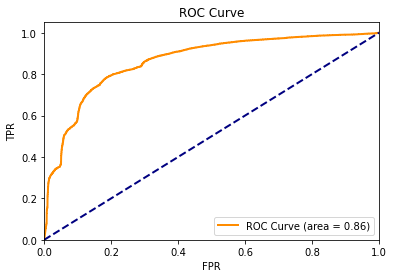

In [31]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = nb.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Gradient Boosting

### First Iteration of the Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier()

# We train model
gbm_model.fit(X_train, Y_train)

GradientBoostingClassifier()

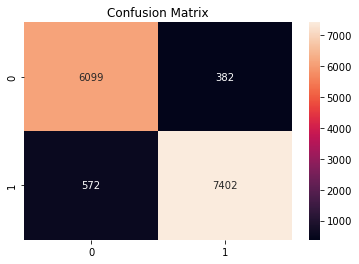

In [33]:
from sklearn.metrics import confusion_matrix
ypred = gbm_model.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [34]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9340020754064338
Precision = 0.9509249743062693
Recall = 0.928266867318786
F1 Score = 0.9394593222490164


ROC AUC = 0.9719677595914542


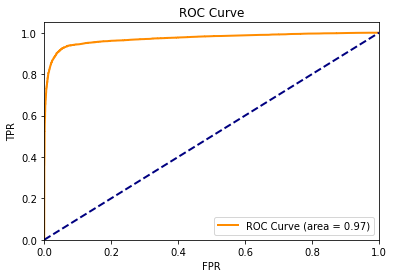

In [35]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = gbm_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Second Iteration of the Gradient Boosting

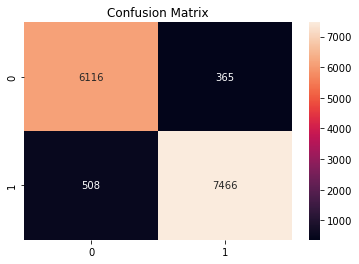

In [36]:
#Second Ieration

from sklearn.ensemble import GradientBoostingClassifier
gbm_model2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=8, random_state=10)

# We train model
gbm_model2.fit(X_train, Y_train)

from sklearn.metrics import confusion_matrix
ypred = gbm_model2.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [37]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9396056727775857
Precision = 0.9533903716000511
Recall = 0.9362929520943065
F1 Score = 0.9447643150901613


ROC AUC = 0.9817292715752982


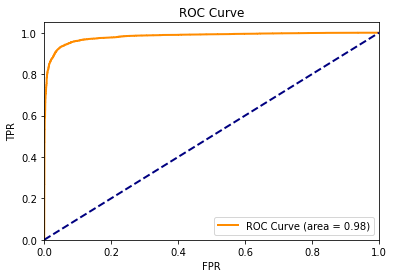

In [38]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = gbm_model2.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Light GBM

In [39]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()

# We train model
lgbm_model.fit(X_train, Y_train)

LGBMClassifier()

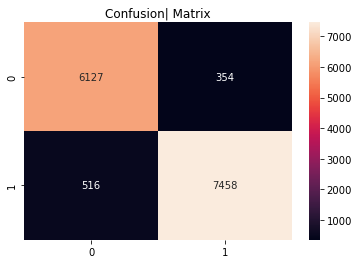

In [40]:
from sklearn.metrics import confusion_matrix
ypred = lgbm_model.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion| Matrix')
plt.show()

In [41]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9398132134209616
Precision = 0.9546850998463902
Recall = 0.9352896914973664
F1 Score = 0.9448878753325731


ROC AUC = 0.9816334405286553


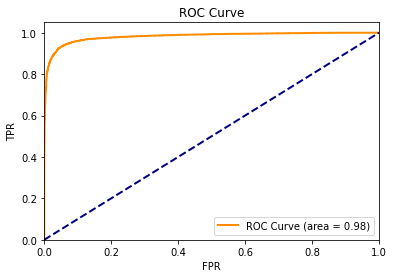

In [42]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = lgbm_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

# We train model
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

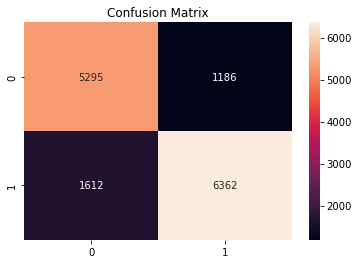

In [44]:
from sklearn.metrics import confusion_matrix
ypred = knn_model.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [45]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8064337599446558
Precision = 0.8428722840487546
Recall = 0.7978429897165789
F1 Score = 0.8197397242623373


ROC AUC = 0.8780411530345092


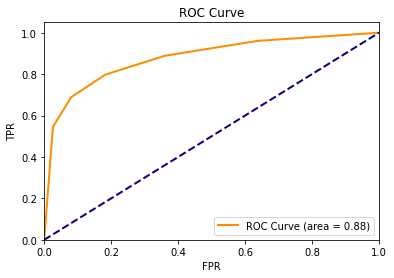

In [46]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = knn_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

### First Iteration of the Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

# We train model
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

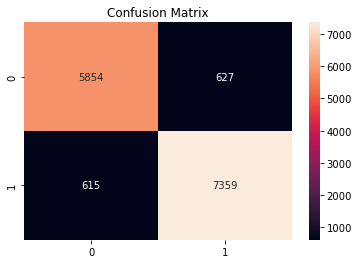

In [48]:
from sklearn.metrics import confusion_matrix
ypred = dt_model.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [49]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9140781736423383
Precision = 0.9214876033057852
Recall = 0.9228743416102333
F1 Score = 0.9221804511278197


ROC AUC = 0.9131216435671758


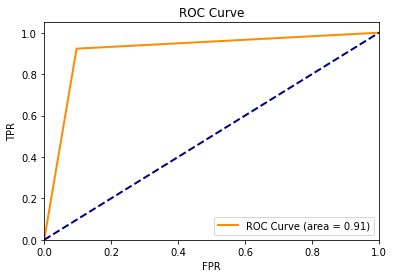

In [50]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = dt_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Second Iteration of the Decision Tree

In [51]:
#Second Iteration

from sklearn.tree import DecisionTreeClassifier

dt_model2 = DecisionTreeClassifier(max_depth = 8, random_state = 42)

# We train model
dt_model2.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

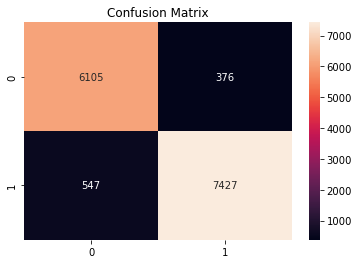

In [52]:
from sklearn.metrics import confusion_matrix
ypred = dt_model2.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [53]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9361466620546524
Precision = 0.9518134051006023
Recall = 0.9314020566842237
F1 Score = 0.9414971160550167


ROC AUC = 0.9709917438433124


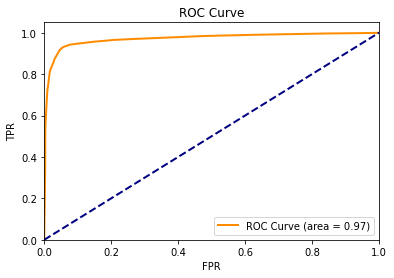

In [54]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = dt_model2.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()